# Lab 2: Newton's law of cooling

- Name: Jasmine Kobayashi
- Lab Partner:

 
## The Euler Algorithm

The standard technique for the numerical solution of differential equations involves the conversion of a differential equation to a *finite difference* equation.

**Example:** The rate of heat loss of a body is proportional to the difference in temperatures between the body $(T)$ and its surroundings $(T_s)$.

$$\frac{dT}{dt} = -R(T-T_s)$$

where $R$ is the cooling constant and $T_s$ is the "surrounding" temperature.
 
If we take a uniform time step $\Delta t$, then this iterative solution can be written, more compactly, as the **Euler Algorithm**, or

$$t^n = t^{n-1} + \Delta t$$

$$T^n  = T^{n-1} - R (T^{n-1} - T_s) \Delta t$$

where $n$ is an integer for the time step.  (Note that we use *superscript* $n$ to indicate the time step.  Later we will use *subscript* to denote the spatial index on a grid.)




## Coffee cooling problem

- Write a program to solve the coffee cup cooling problem using the Euler method, i.e., 
\begin{equation}
\frac{dT(t)}{dt} = -R [T(t) - T_A] \nonumber
\end{equation}
where $T(t)$ is the temperature of water at time $t$, $T_A$ is the temperature of air, and $R$ is the cooling constant. 

- Use your program to determine $R$ for the experimental data in Table
below for cooling of a cup of coffee in a ceramic mug (the air temperature was 22.0 $^\circ$C).  Since time is measured in minutes, the units of the cooling constant $R$ are min$^{-1}$.  Do several runs with smaller and smaller time intervals
until the results look like they are converging.  Include a graph of
your final simulation results along with the data.  Describe any difficulties in fitting the data and mitigation strategies.


|$t$ (min) | $T$ ($^\circ$C) |
|----------:|-----------:|
|0 | 83.0 |
|1.0 | 77.7 |
|2.0 | 75.1 |
|3.0 | 73.0 |
|4.0 | 71.1 |
|5.0 | 69.4 |
|6.0 | 67.8 |
|7.0 | 66.4 |
|8.0 | 64.7 |
|9.0 | 63.4 |
|10.0 | 62.1 |
|11.0 | 61.0 |
|12.0 | 59.9 |
|13.0 | 58.7 |
|14.0 | 57.8 |
|15.0 | 56.6 |

- The boundary layer model for a water/air interface predicts
\begin{equation}
R = \frac{\kappa A}{MC \Delta x} \nonumber
\end{equation}
where $\kappa$ is the thermal conductivity of air (0.0237
W/m$~^\circ$C), $A$ is the surface area of the water, $M$ is the mass
of the water, $C$ is the specific heat of water ($4.19 \times 10^3$
J/kg $^\circ$C), and $\Delta x$ is the thickness of the boundary
layer.  Estimate $M$ and $A$ for a typical cup of coffee and find
$\Delta x$. 




R constant from data: 0.030567685589519465 min^-1
Calculated delta x= 0.0038118273798025334 meters


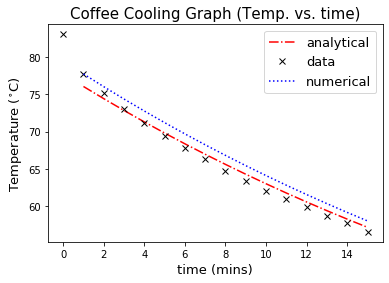

In [26]:
#---------------------------------------------------------------------------------
#Coffee cup cooling problem
#Name: Jasmine Kobayashi
#Lab partner:
#Date: 1/23/20
#---------------------------------------------------------------------------------

#import necessary modules
import numpy as np
import matplotlib.pyplot as plt

#Define constants and initialize variables---------------------------------------------------------------------------------
def radi(m,h):                                 #Radius;calculated using estimated mass and height (in case want to change est. mass and height)
    return (m/(np.pi*h))**(1/2)

m = 0.354                                      #m = est. mass, in liters or kilograms (1 liter= 1 kilogram)
h = 0.10                                       #h = est. height, in meters


def Sur_A(h):                                 #Surface Area function; calculated using est. mass and calculated radius
    return 2*radi(m,h)*h+2*np.pi*radi(m,h)**2


def delta_x(m):                               #Delta x function; using est. mass & height (includes above radi & SA functions)
    return (0.0237*Sur_A(h))/(R_cnst(T1,T2,t1,t2,Ts)*m*4.19e3)   #Uses thermal cond. k=0.0237 (W/m deg.C) and specific heat of water C=4.19e3 (J/kg deg.C)


def R_cnst(T1,T2,t1,t2,Ts):                   #function for constant R calculated from experimental data
    return -(T2-T1)/((t2-t1)*(T2-Ts))                                    

T1 = 66.4                                     #T1 = T^n
T2 = 67.8                                     #T2 = T^n-1                (or the temp before T1; the warmer temperature)
t1 = 7                                        #t1 = time for T^n
t2 = 6                                        #t2 = time for T^n-1       (or the time before t1)


def Analy_soln(time,T0,R,Ts):                    #Analytical solution, function copied from cooling notes
    return (T0-Ts)*np.exp(-R*time)+Ts

Ts = 22.0                                     #outside temperature (degrees C)
T0 = 77.7                                     #initial coffee temperature (degrees C)
R = R_cnst(T1,T2,t1,t2,Ts)                    #cooling rate in min^-1 (using calculated R constant from data)
time = np.arange(1,16,1)

#Add experimental data-----------------------------------------------------------------------------------------------------
T= [83.0,77.7, 75.1, 73.0, 71.1, 69.4, 67.8, 66.4, 64.7, 63.4, 62.1, 61.0, 59.9, 58.7, 57.8, 56.6]   #Temperature Data

t = np.arange(0,16,1)                                                            #Time, 0 to 15 (min) with 1 step intervals

#Construct a time stepping loop to solve the ODE using the Euler algorithm-------------------------------------------------

def numerical_soln(T0,Ts,R,dt):               #Numerical solution. Pretty much copied from the cooling notes.
    return T0-R*(T0-Ts)*dt


dt = time[1]-time[0]
Temp = []
Temp.append(T0)
Tinit=T0

for i in range(1,len(time)):
    tmp = numerical_soln(Tinit,Ts,R,dt)
    Temp.append(tmp)
    Tinit = tmp
    
#Print statements---------------------------------------------------------------------------------------------------------
print ('R constant from data:',R_cnst(T1,T2,t1,t2,Ts), "min^-1")
print ('Calculated delta x=', delta_x(m),'meters')

#Plot results-------------------------------------------------------------------------------------------------------------
plt.plot(time,Analy_soln(time,T0,R,Ts),'r-.',label = 'analytical')        #red = analytical
plt.plot(t,T,'kx', label = 'data')                                  #yellow = data
plt.plot(time,Temp,'b:', label='numerical')                        #blue + = numerical
plt.title('Coffee Cooling Graph (Temp. vs. time)',fontsize = 15)
plt.xlabel('time (mins)',fontsize=13)
plt.ylabel('Temperature ($^{\circ}$C)',fontsize=13)
plt.legend(fontsize=13)
plt.show()

## ODE in dimensionless form

Write a new version of the cooling law ODE code in dimensionless form.
That is, solve the following ODE of the form  
\begin{equation}
 \frac{dy}{d \tau} = -y \nonumber
\end{equation}
choosing normalizing factors so that $y(0) = 1$ and $y(\tau) = e^{-\tau}$.

- What value of $\Delta \tau$ is necessary for an accuracy of 0.02\% at $\tau =
1$?

- Apply the physical constrains to verify that the dimensionless version can reproduce the results from above, i.e., you will have to "reconstitute" the dimensions using the normalization parameters. 

**Derivation (Coffee cooling problem, ODE)**


- Dimensionless time

\begin{equation*}
\tau = \frac{t}{t_o}
\end{equation*}
 
- Dimensionless temperature

\begin{equation*}
y = \frac{T(t) - T_A}{T_o}
\end{equation*}


\begin{equation*}
dt  = t_o d\tau, ~~dT = T_o dy
\end{equation*}

\begin{equation*}
\frac{dT}{dt} = \frac{T_o dy}{t_o d\tau} = -R(T - T_A) = -R T_o y
\end{equation*}

\begin{equation*}
\frac{dy(\tau)}{d\tau} = -(t_o R) y(\tau)
\end{equation*}

Let $t_o = 1/R$, $T(0) = T_i$ so that $y(0) = (T_i- T_A)/T_o$.  If $y(0) = 1$ then $T_o = T_i - T_A$.

\begin{equation*}
\frac{dy(\tau)}{d\tau} = -y(\tau)
\end{equation*}





Text(0.5, 1.0, 'Dimensionless representation')

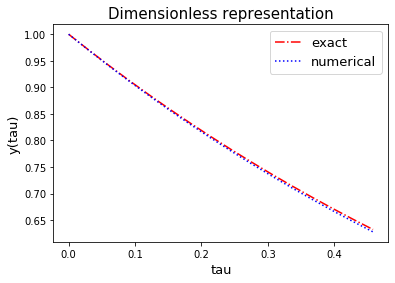

In [27]:
#Dimensionless ODE

def y_exact(tau):                                 #y(tau)=e^(-tau)
    return np.exp(-tau)

tau = t*R                                         #b/c of normalization described above & tau=t/t0 
                                                  #(t=0-15mins from above, R=calculated R constant from above)
    
def numerical_y(dtau,y0):
    return y0-y0*dtau
y0=1

dtau = tau[1]-tau[0]                              #essentially followed same format as numerical with dimension above
y = []
yin = y0
y.append(y0)

for i in range(1,len(tau)):
    yp = numerical_y(dtau,yin)
    y.append(yp)
    yin = yp
    
plt.plot(tau,y_exact(tau),"r-.",label="exact")
plt.plot(tau,y,"b:",label="numerical")
plt.xlabel("tau",fontsize= 13)
plt.ylabel("y(tau)",fontsize= 13)
plt.legend(fontsize= 13)
plt.title("Dimensionless representation",fontsize= 15)

## Note about trying to find $\Delta\tau$ (-Jasmine)

So clearly, with my equations the percent error calculations are quite off and do not work well to try to find $\Delta\tau$. It seems to me that it comes from my numerical equation for the dimensionless form. From what I remember from your and other examples they were supposed to consist of some $\tau$ and $\tau_{final}$, *as well as* $\Delta\tau$? But I was not really sure how those $\tau$ and $\tau_{final}$ got incorporated along with the $\Delta\tau$. (I'm not sure if that means the above version for reproducing results is also wrong, even though it fits nicely on the graph. Maybe it fits *too* nicely?) 

Anyway, it's getting too late to try to work through it anymore than this, and I still want to turn in what I do have on time, so I'm afraid I'll have to leave this part of this lab like this for now. 

Text(0, 0.5, '% Error')

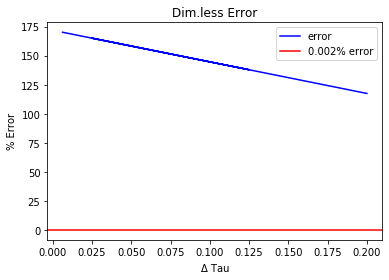

In [28]:
#Graphing % error to estimate delta tau

ex = y_exact(Tau)

#def Numerical_y(dtau,tau,y0)

Dtau=[0.2,0.1,0.05,0.025,0.125,0.00625]               
y_err = []

for j in range(0,len(Dtau)):
    Tau= np.arange(0,2,0.1)
    yd = numerical_y(Dtau[j],y0)
    err= (abs(yd - np.exp(-1))/np.exp(-1))*100
    y_err.append(err)


plt.plot(Dtau,y_err,"b",label="error")
plt.axhline(y=0.02,color='red',label="0.002% error")              #y=0.002% line to see/estimate what delta tau is easier
plt.legend()
plt.title("Dim.less Error")
plt.xlabel("$\Delta$ Tau")
plt.ylabel("% Error")

In [29]:
print (y_err)

[117.46254627672363, 144.64536456131407, 158.23677370360926, 165.0324782747569, 137.84965999016646, 170.12925670311762]


## Truncation Error

Since we have replaced a differential equation by a difference equation, we know that our numerical solution cannot be identically equal to the "true" solution of the original differential equation.  In general, the discrepancy between the two solutions is due to two causes.  First, computers do not store real numbers with infinite precision.  Arithmetic operations such as addition and division can introduce additional error, called *roundoff error*.  The significance of roundoff errors is that they accumulate with an increasing number of calculations.  The second source of discrepancy  is due to the choice of algorithm.  This error is called the *truncation error*.  

- To illustrate *truncation error*, show (in this markdown cell) that the Euler method is first order using a Taylor series expansion.  That is, compare the **Euler Algorithm** the the Taylor series. We represent the truncation error with the order of the leading term in the error.  For example, if the leading term contains $\Delta t^2$, then we represent the error as $\mathcal{O(\Delta t^2)}$...and the algorithm is first order accurate. 

------------------------------------------------------- **Jasmine's work**----------------------------------------------------

So we know that a function defined from the Taylor series is built like this:

$$f(x) = f(a) + \frac{f'(a)(x-a)}{1!} + \frac{f''(a)(x-a)^2}{2!} + \frac{f'''(a)(x-a)^3}{3!} + ...$$

And the Euler equation starts off looking off something like this:
$$\frac{dT}{dt} = -R(T-T_s)$$

- Where $T$ = temperature (of the coffee in this case), $t$ = time, $R$ = the cooling constant, and $T_s$ = the "*surrounding* temperature" or the outside temperature.

To start it would be helpful to first rearrange the equation to be a function, not a derivative of a function. 
So we can start by changing the $\frac{dT}{dt}$ to its more literal meaning.

$$\frac{dT}{dt} = \frac{\Delta T}{\Delta t} = \frac{T^n - T^{n-1}}{\Delta t}$$

- Where $T^n$ and $T^{n-1}$ are temperatures at different times. ($T^{n-1}$ would be temp. before $T^n$) 

Then the equation can be rearranged to look like this:

$$T^n = T^{n-1} - R(T^{n-1} - T_s)\Delta t$$

And if we view the function to represent the temperature at a given time it could be written like this.

$$T(t^n) = T^{n-1} - R(T^{n-1} - T_s)\Delta t$$ 

And as mentioned before, $\frac{dT}{dt} = -R(T-T_s)$ so we can rewrite again to,

$$T(t^n) = T^{n-1} + \frac{dT}{dt}\Delta t$$ 

$$= T^{n-1} + T'(t^{n-1})\Delta t$$

$$= T(t^{n-1}) + T'(t^{n-1})\Delta t$$

Around here it is easier to start seeing the resemblence to the Taylor series. But there's still a few thing we can do to the Taylor series so that it would have a similar form to the above Euler equation. Like showing steps in the $x$ values.

$$x^n = x^{n-1} + \Delta x $$

$$x \to x^n$$
$$a \to x^{n-1}$$

So, 
$$f(x) = f(a) + \frac{f'(a)(x-a)}{1!} + \frac{f''(a)(x-a)^2}{2!}+...$$ 

$$\Rightarrow  f(x^n) = f(x^{n-1} + \Delta x) = f(x^{n-1}) + f'(x^{n-1})(\Delta x) + \frac{f''(x^{n-1})(\Delta x)^2}{2!} + ...$$ 

And it is not difficult to see that $t^n = t^{n-1} + \Delta t$ for the Euler equation also (plus it was mentioned further above).

$$T(t^{n-1}+ \Delta x) = T(t^{n-1}) + T'(t^{n-1})\Delta t$$

So now it is easy to see that the Euler algorithm is a rewrite of the first two terms of the Taylor series. Meaning that the leading term of the truncated remaining terms contains a $\Delta t^2$ so the error is $\mathcal{O(\Delta t^2)}$ 

$$T(t^{n-1}+ \Delta x) = T(t^{n-1}) + T'(t^{n-1})\Delta t + \mathcal{O(\Delta t^2)}$$

and the algorithm is indeed first order accurate. 

----------------------------------------------- **End of Jasmine's work**------------------------------------------------------

- Plot the difference between the exact solution and the numerical
solution as a function of $\Delta t$.  A numerical method is called
$n$th order if the difference between the analytical and numerical
solutions at a fixed value of $t$ is proportional to $(\Delta t)^n$.
Verify that the Euler method is first order accurate. 

Text(0, 0.5, 'Temp')

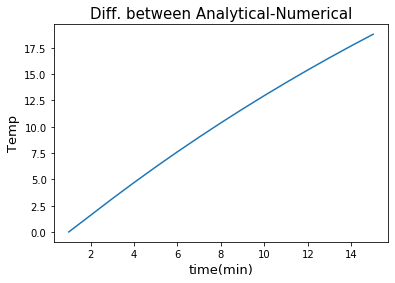

In [30]:
#Difference between exact and numerical
plt.plot(time,abs(Analy_soln(time,T0,R,Ts)-numerical_soln(T0,Ts,R,dt)))
plt.title("Diff. between Analytical-Numerical",fontsize=15)
plt.xlabel("time(min)",fontsize=13)
plt.ylabel("Temp",fontsize=13)